Main Examples to try to plot.

Welcome to Naima: https://naima.readthedocs.io/en/latest/

Radiative Models: https://naima.readthedocs.io/en/latest/api-models.html#naima.models.PionDecay

Sherpa: https://naima.readthedocs.io/en/latest/sherpa.html

Likelihood Model Fitting: https://naima.readthedocs.io/en/latest/mcmc.html

In [1]:
from astro_constants import *
from source_info import *
from parameters import *
from particles import *

Output saved to coronal_parameters.txt
Output appended to coronal_parameters.txt


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import quad
from astropy import units as u
from astropy import constants as const
from scipy.stats import chisquare
from scipy.optimize import curve_fit

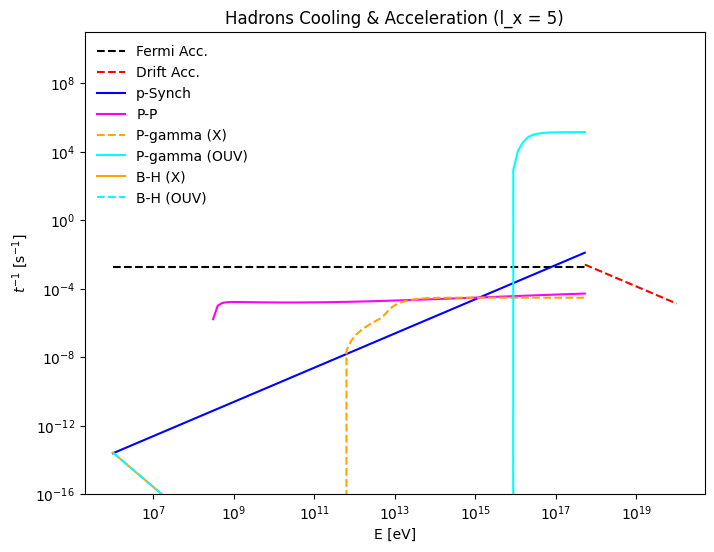

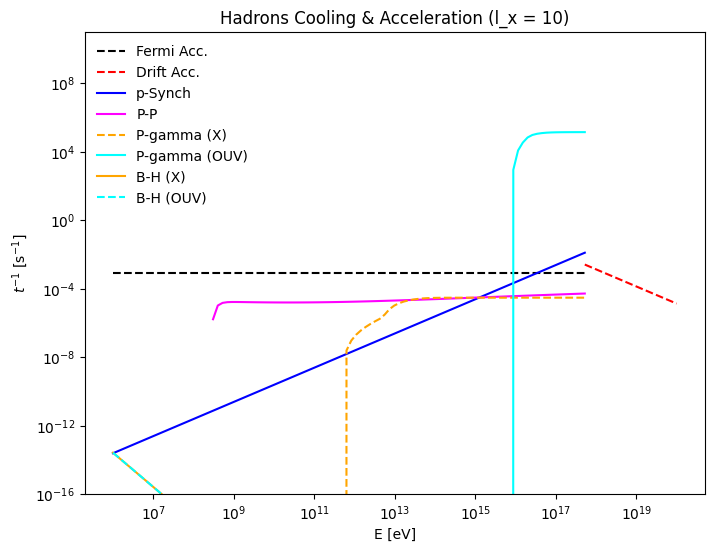

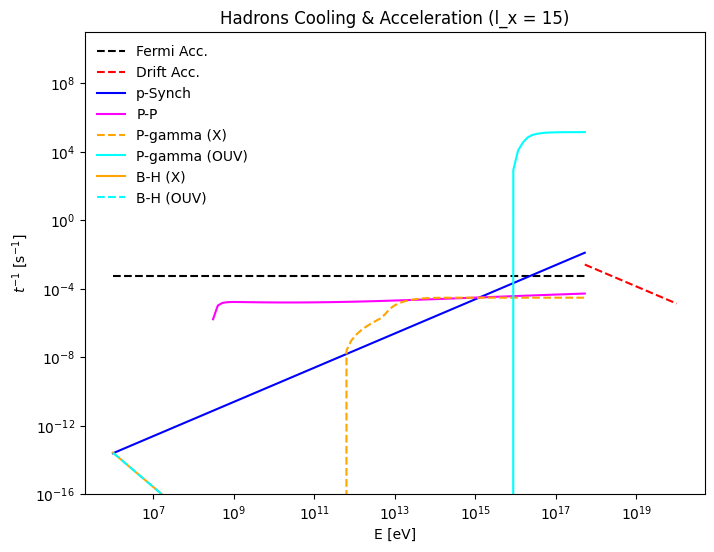

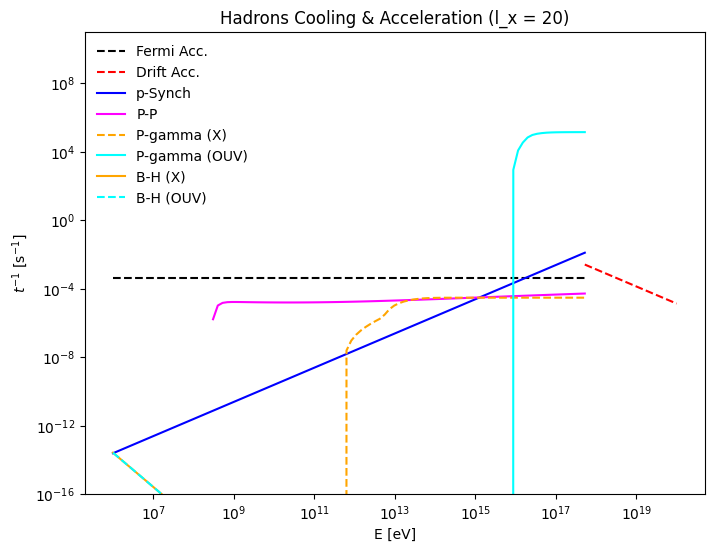

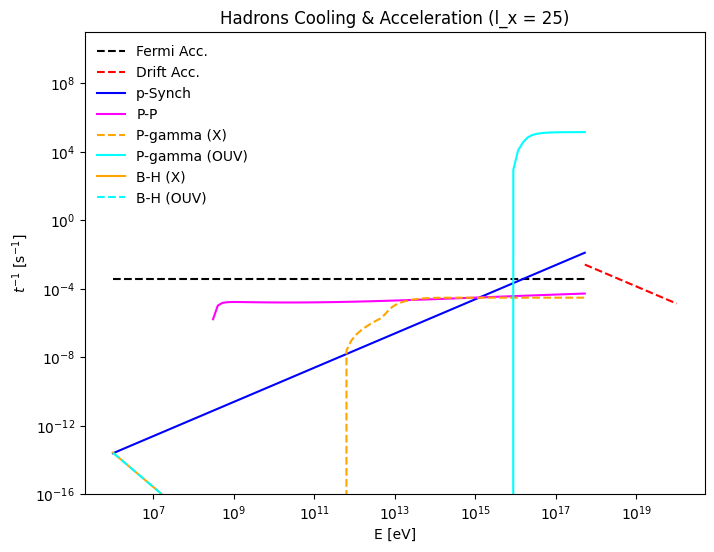

In [3]:
# Loop over different L values
for l_x in l_values:
    # Initialize coronal parameters
    coronal_data = Coronal_Description(r_x, l, l_x, mdot, m)
    
    B_c = coronal_data.coronal_mag_field()
    n_c = coronal_data.coronal_density()
    T_c = coronal_data.coronal_temperature()
    delta_RX = coronal_data.width_current_sheet()
    wdot_B = coronal_data.mag_rec_power()
    
    # Compute acceleration & loss rates
    fermi_acc = 1 / t_acc_fermi(va, delta_RX)
    drift_acc = 1 / t_acc_drift(Ep_drift, B_c, va)
    synch_loss = rate_synch(Ep, B_c, mp)
    Ep_filtered = Ep[Ep/eV > 10**(8.37)]
    rate_p_p_filtered = rate_p_p(n_c, Ep)[Ep/eV > 10**(8.37)]

    # Create a separate figure for each L
    plt.figure(figsize=(8, 6))
    plt.loglog(Ep/eV, [fermi_acc] * len(Ep), '--', label='Fermi Acc.',color='black')
    plt.loglog(Ep_drift/eV, drift_acc, '--', label='Drift Acc.',color='red')
    
    plt.loglog(Ep/eV, synch_loss, label='p-Synch',color='blue')
    plt.loglog(Ep_filtered/eV, rate_p_p_filtered, label='P-P', color='magenta')
    
    plt.loglog(Ep/eV,rate_p_gamma(Ep, eps_x, nph_x),'--',label='P-gamma (X)',color='orange')
    plt.loglog(Ep/eV,rate_p_gamma(Ep, eps_OUV, nph_OUV),label='P-gamma (OUV)',color='cyan')
    
    plt.loglog(Ep/eV,rate_bth_cool(Ep, eps_x, nph_x),label='B-H (X)', color='orange')
    plt.loglog(Ep/eV,rate_bth_cool(Ep, eps_OUV, nph_OUV),'--',label='B-H (OUV)', color='cyan')

    plt.xlabel('E [eV]')
    plt.ylabel('$t^{-1}$ [s$^{-1}$]')
    plt.title(f'Hadrons Cooling & Acceleration (l_x = {l_x})')
    plt.legend(frameon=False, loc='upper left')
    plt.ylim((1e-16, 1e11))
    
    # Save each plot separately
    plt.savefig(f'plots/tests/cooling_hadrons_l_x{l_x}.png', dpi=300)
    plt.show()

In [4]:
rate_IC_X = rate_IC(Ee, eps_x, nph_x)

rate_IC_OUV = rate_IC(Ee, eps_OUV, nph_OUV)



 Calculating IC rate (accounting for KN regime):



 Calculating IC rate (accounting for KN regime):



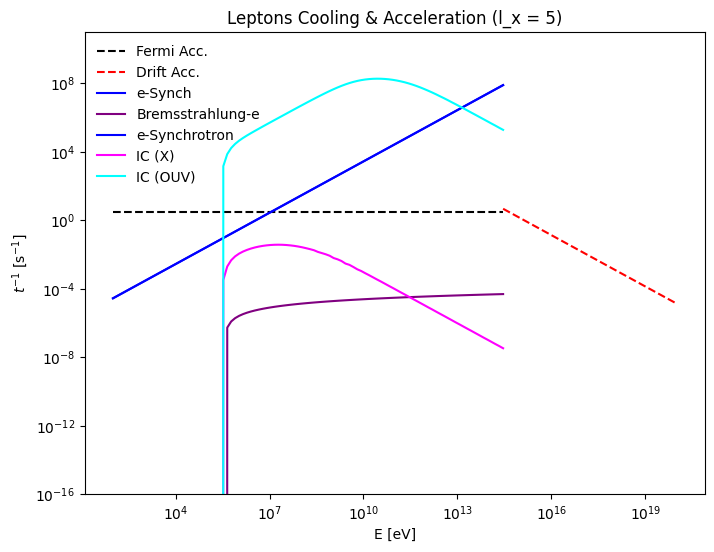

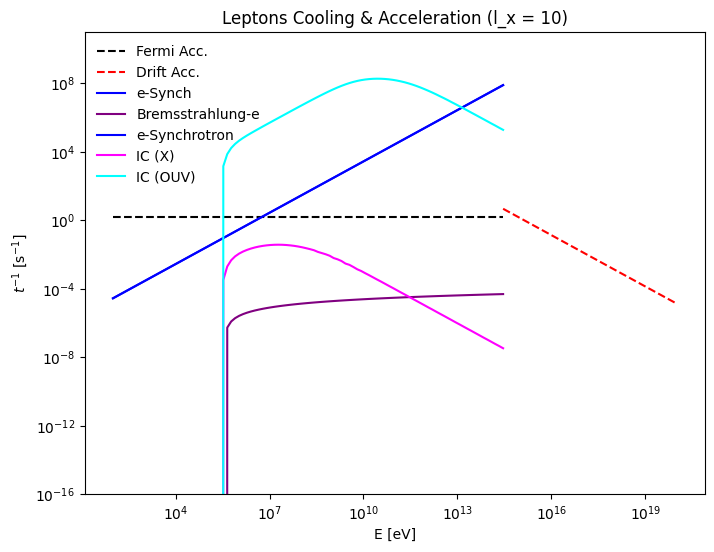

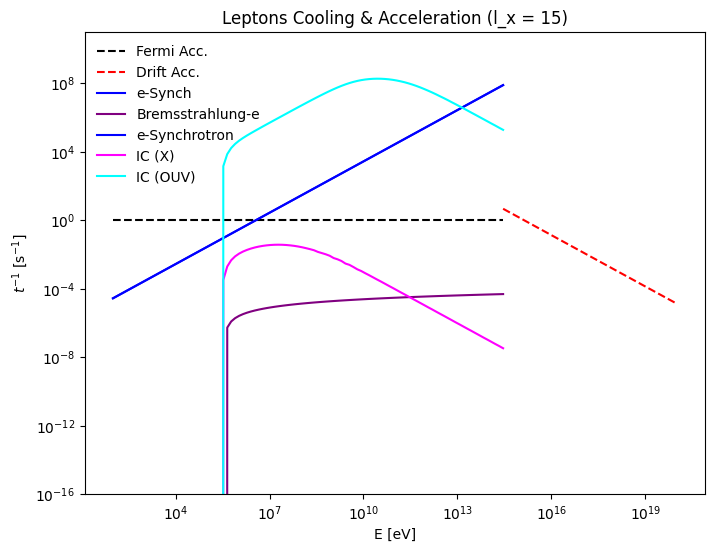

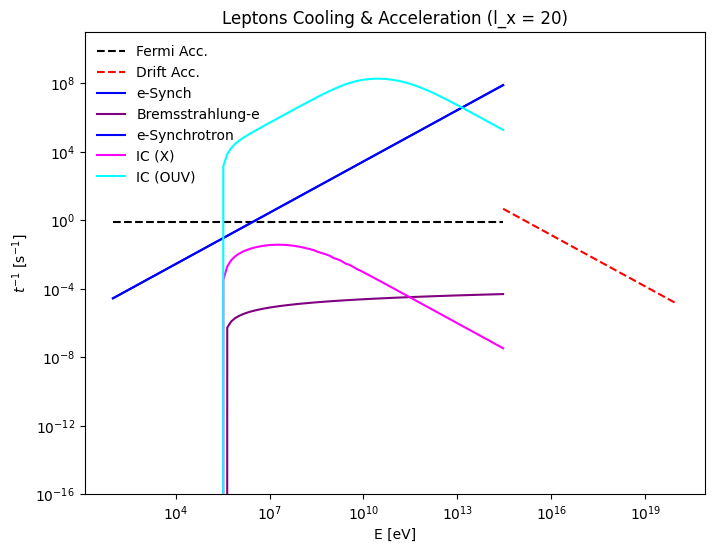

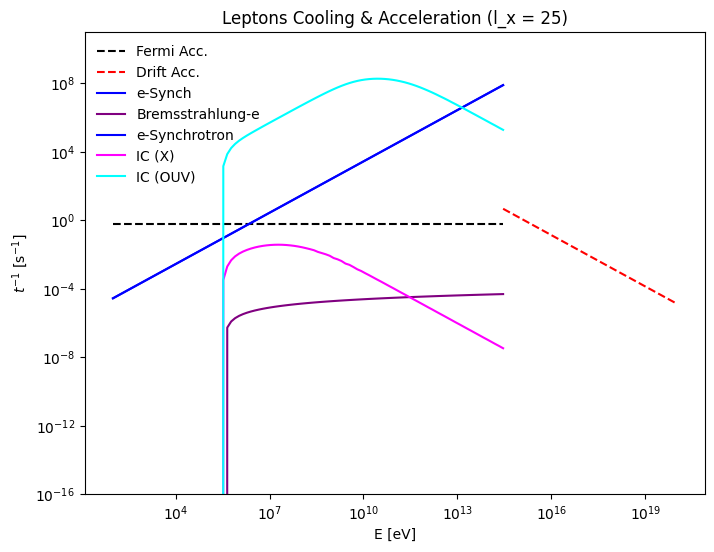

In [5]:
# Loop over different L values
for l_x in l_values:
    # Initialize coronal parameters
    coronal_data = Coronal_Description(r_x, l, l_x, mdot, m)
    
    B_c = coronal_data.coronal_mag_field()
    n_c = coronal_data.coronal_density()
    T_c = coronal_data.coronal_temperature()
    delta_RX = coronal_data.width_current_sheet()
    wdot_B = coronal_data.mag_rec_power()
    
    # Compute acceleration & loss rates
    fermi_acc = 1 / t_acc_fermi(va, delta_RX)
    drift_acc = 1 / t_acc_drift(Ee_drift, B_c, va)
    synch_loss = rate_synch(Ee, B_c, me)
    brems_loss = rate_bremss_e(n_c, 1, Ee)

    # Create a separate figure for each L
    plt.figure(figsize=(8, 6))
    plt.loglog(Ee/eV, [(mp/me)*fermi_acc] * len(Ee), '--', label='Fermi Acc.',color='black')
    plt.loglog(Ee_drift/eV, drift_acc, '--', label='Drift Acc.',color='red')
    
    plt.loglog(Ee/eV, synch_loss, label='e-Synch',color='blue')
    
    ## losses
    plt.loglog(Ee/eV, brems_loss, label='Bremsstrahlung-e',color='purple')
    plt.loglog(Ee/eV, synch_loss, label='e-Synchrotron',color='blue')
    plt.loglog(Ee/eV, rate_IC_X, label='IC (X)',color='magenta')
    plt.loglog(Ee/eV, rate_IC_OUV, label='IC (OUV)',color='cyan')

    plt.xlabel('E [eV]')
    plt.ylabel('$t^{-1}$ [s$^{-1}$]')
    plt.title(f'Leptons Cooling & Acceleration (l_x = {l_x})')
    plt.legend(frameon=False, loc='upper left')
    plt.ylim((1e-16, 1e11))
    
    # Save each plot separately
    plt.savefig(f'plots/tests/cooling_leptons_l_x{l_x}.png', dpi=300)
    plt.show()

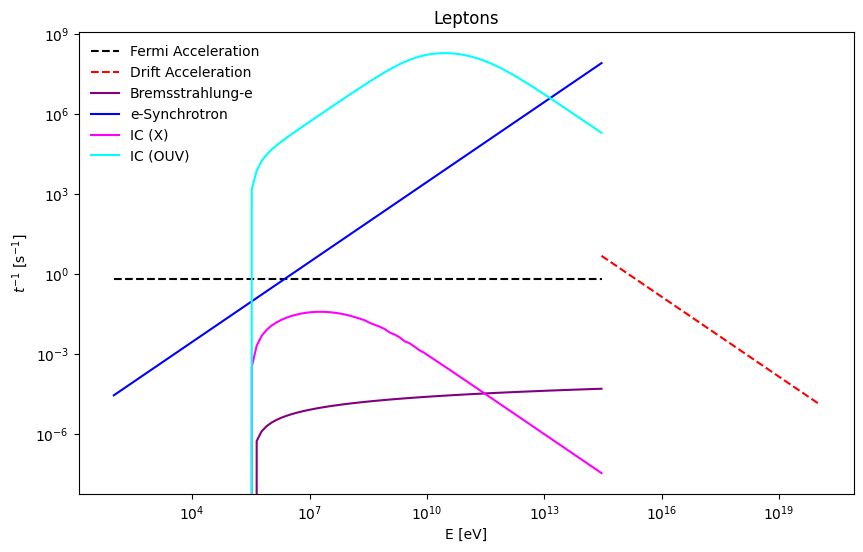

In [6]:
## leptons

plt.figure(figsize=(10, 6))

## acceleration
plt.loglog(Ee/eV,[(mp/me)*1/t_acc_fermi(va, delta_RX)]*len(Ee),'--',label='Fermi Acceleration',color='black')
plt.loglog(Ee_drift/eV,1/t_acc_drift(Ee_drift, B_c, va),'--',label='Drift Acceleration',color='red')

## losses
plt.loglog(Ee/eV,rate_bremss_e(n_c, 1, Ee),label='Bremsstrahlung-e',color='purple')
plt.loglog(Ee/eV,rate_synch(Ee, B_c, me),label='e-Synchrotron',color='blue')
plt.loglog(Ee/eV,rate_IC_X,label='IC (X)',color='magenta')
plt.loglog(Ee/eV,rate_IC_OUV,label='IC (OUV)',color='cyan')


# plt.xlim((1e9,Ep.max()/eV))
# plt.ylim((1e-11,1e6))

plt.xlabel('E [eV]')
plt.ylabel('$t^{-1}$ [s$^{-1}$]')
plt.title('Leptons')

plt.legend(frameon=False,loc='upper left')
plt.savefig('plots/cooling_leptons_eV.png',dpi=300)

plt.show()

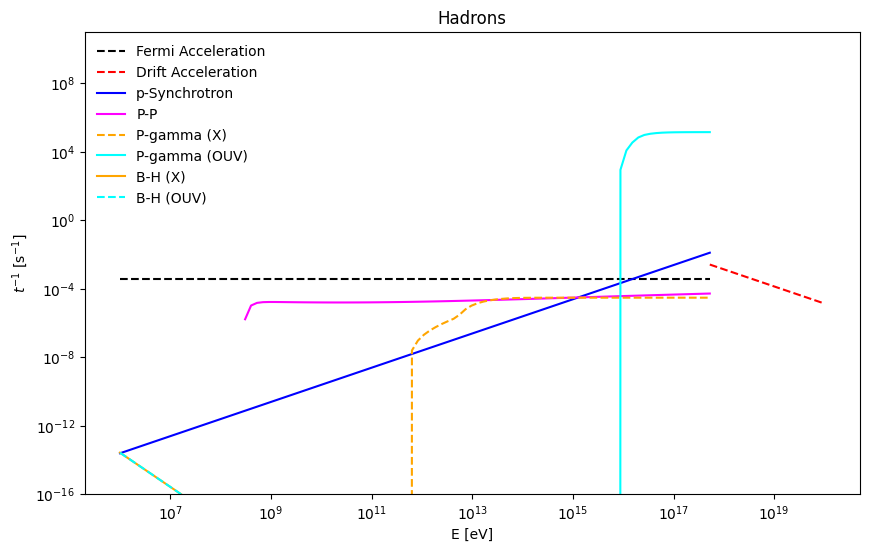

In [7]:
## hadrons

plt.figure(figsize=(10, 6))

## acceleration
plt.loglog(Ep/eV,[1/t_acc_fermi(va, delta_RX)]*len(Ep),'--',label='Fermi Acceleration',color='black')
plt.loglog(Ep_drift/eV,1/t_acc_drift(Ep_drift, B_c, va),'--',label='Drift Acceleration',color='red')

## losses
plt.loglog(Ep/eV,rate_synch(Ep, B_c, mp),label='p-Synchrotron',color='blue')
# plt.loglog(Ep/eV,rate_p_p(n_c, Ep),label='P-P',color='magenta')

# Apply the condition for plotting only after 10^8 eV
Ep_filtered = Ep[Ep/eV > 10**(8.37)]
rate_p_p_filtered = rate_p_p(n_c, Ep)[Ep/eV > 10**(8.37)]
plt.loglog(Ep_filtered/eV, rate_p_p_filtered, label='P-P', color='magenta')

plt.loglog(Ep/eV,rate_p_gamma(Ep, eps_x, nph_x),'--',label='P-gamma (X)',color='orange')
plt.loglog(Ep/eV,rate_p_gamma(Ep, eps_OUV, nph_OUV),label='P-gamma (OUV)',color='cyan')
# plt.loglog(Ep/eV,rate_pg_cool(Ep, eps_x, nph_x),label='P-gamma (X)', color='red')
# plt.loglog(Ep/eV,rate_pg_cool(Ep, eps_OUV, nph_OUV),label='P-gamma (OUV)',color='blue')

plt.loglog(Ep/eV,rate_bth_cool(Ep, eps_x, nph_x),label='B-H (X)', color='orange')
plt.loglog(Ep/eV,rate_bth_cool(Ep, eps_OUV, nph_OUV),'--',label='B-H (OUV)', color='cyan')

# plt.loglog(Ep/eV,cooling_rate_bth_isotropic,label='B-H (X)',color='orange')
# plt.loglog(Ep/eV,cooling_rate_bth_ou,label='B-H (OUV)',color='purple')

# plt.xlim((1e7,1e20))
plt.ylim((1e-16,1e11))

plt.xlabel('E [eV]')
plt.ylabel('$t^{-1}$ [s$^{-1}$]')
plt.title('Hadrons')

plt.legend(frameon=False,loc='upper left')
# plt.xticks([1e9,1e10,1e11,1e12,1e13,1e14,1e15],labels=['9','10','11','12','13','14','15'])
plt.savefig('plots/cooling_hadrons_eV.png',dpi=300)

plt.show()